#                                       Task 1: Exploratory Data Analysis (EDA)

### Importing Necessary Libraries
- **Description**: The following libraries are imported for data analysis and visualization:
  - `pandas`: Used for data manipulation and analysis.
  - `matplotlib.pyplot`: Used for creating static, animated, and interactive visualizations in Python.
  - `seaborn`: A Python visualization library based on `matplotlib` that provides a high-level interface for drawing attractive statistical graphics.
  - `datetime`: A module for manipulating dates and times.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Loading the Datasets
- **Description**: The following datasets are loaded into pandas DataFrames:
  - `Customers.csv`: Contains customer-related data.
  - `Products.csv`: Contains product-related data.
  - `Transactions.csv`: Contains transaction-related data.



In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

### Inspecting the Data
- **Description**: The first few rows of each dataset are printed to inspect their structure and ensure the data is loaded correctly.



In [3]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

### Data Preprocessing: Converting to Datetime
- **Description**: The `SignupDate` column in the `customers` dataset and the `TransactionDate` column in the `transactions` dataset are converted to the `datetime` format for easier manipulation and analysis.




In [4]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

### Checking for Missing Values
- **Description**: The `.isnull().sum()` function is used to check the number of missing (null) values in each column of the datasets. This helps identify any data quality issues that need to be addressed.
  



In [5]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Summary Statistics
- **Description**: The `.describe()` function is used to generate summary statistics for the datasets, including count, mean, standard deviation, min, max, and percentiles. This provides an overview of the numerical data in each dataset.



In [8]:
print(customers.describe())
print(products.describe())
print(transactions.describe())

                SignupDate
count                  200
mean   2023-07-19 08:31:12
min    2022-01-22 00:00:00
25%    2022-09-26 12:00:00
50%    2023-08-31 12:00:00
75%    2024-04-12 12:00:00
max    2024-12-28 00:00:00
            Price
count  100.000000
mean   267.551700
std    143.219383
min     16.080000
25%    147.767500
50%    292.875000
75%    397.090000
max    497.760000
                     TransactionDate     Quantity   TotalValue       Price
count                           1000  1000.000000  1000.000000  1000.00000
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000
std                   

The summary statistics for each dataset, including count, mean, standard deviation, min, max, and other percentiles. <br>
describe(): Generates summary statistics for numerical columns in the DataFrame.

# Visualizations

### 1. Customers by Region
- **Visualization Type**: Count Plot
- **Description**: This plot shows the distribution of customers across different regions. It provides insights into which regions have the highest number of customers.


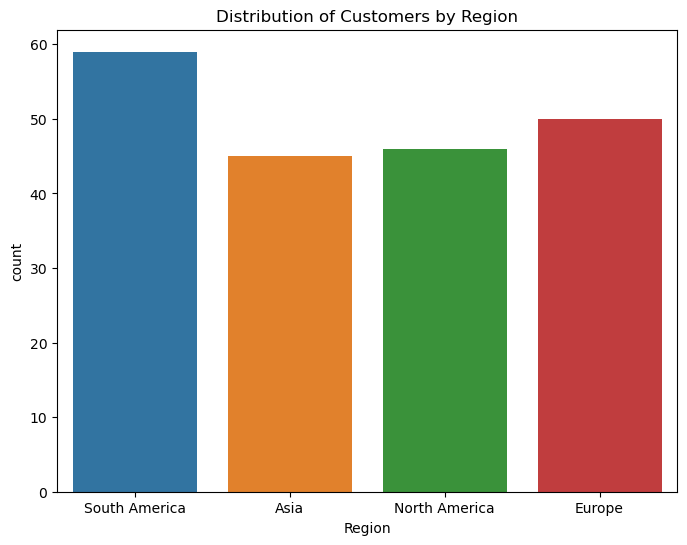

In [9]:
plt.figure(figsize=(8,6))
sns.countplot(x='Region', data=customers)
plt.title('Distribution of Customers by Region')
plt.show()

### 2. Signups Over Time
- **Visualization Type**: Time Series Plot
- **Description**: This plot displays customer signups over time. The data is aggregated by month to provide an overview of trends and spikes in signups.



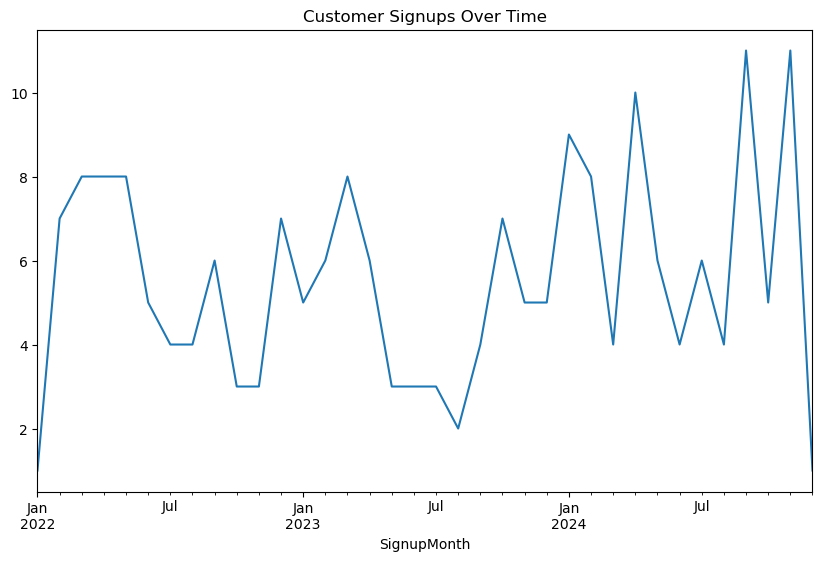

In [10]:
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_counts = customers.groupby('SignupMonth').size()
signup_counts.plot(figsize=(10,6), title='Customer Signups Over Time')
plt.show()

### 3. Distribution of Product Prices
- **Visualization Type**: Histogram with KDE
- **Description**: This plot shows the distribution of product prices, with a kernel density estimate (KDE) to show the data's probability distribution. It helps to understand the price range and common price points.



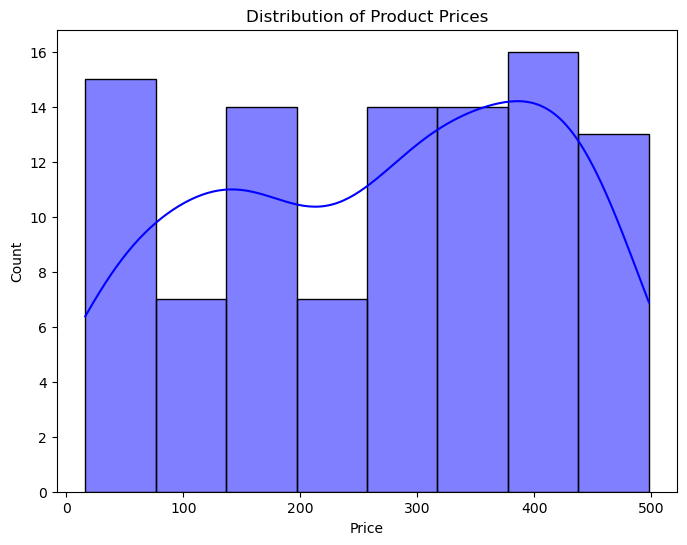

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(products['Price'], kde=True, color='blue')
plt.title('Distribution of Product Prices')
plt.show()

### 4. Transaction Total Value Distribution
- **Visualization Type**: Histogram with KDE
- **Description**: This plot shows the distribution of total transaction values. A KDE is applied to better understand the distribution's shape and identify peaks in transaction values.



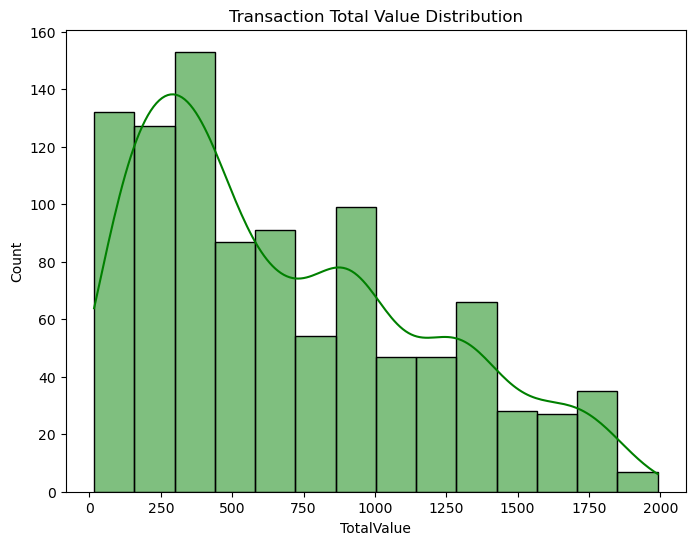

In [12]:
plt.figure(figsize=(8,6))
sns.histplot(transactions['TotalValue'], kde=True, color='green')
plt.title('Transaction Total Value Distribution')
plt.show()

### 5. Top Selling Products by Total Value
- **Visualization Type**: Bar Plot
- **Description**: This bar plot visualizes the top 10 products by total sales value. It helps identify which products are the most popular and generate the highest revenue.



In [13]:
product_sales = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
product_sales = product_sales.merge(products[['ProductID', 'ProductName']], on='ProductID', how='left')
top_products = product_sales.sort_values(by='TotalValue', ascending=False).head(10)

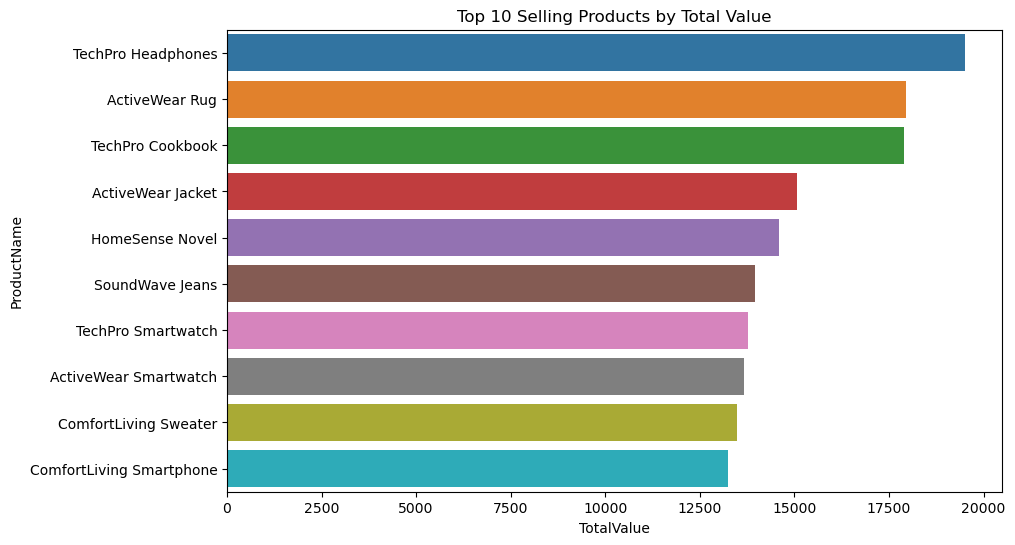

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='TotalValue', y='ProductName', data=top_products)
plt.title('Top 10 Selling Products by Total Value')
plt.show()

# Additional Analysis

### 6. Merging Datasets for Sales Analysis
- **Description**: This step merges the `transactions`, `customers`, and `products` datasets to combine relevant information for further analysis. The `transactions` data is merged with the `customers` dataset to add the `Region` column, and then it is merged with the `products` dataset to include the `Category` of each product.



In [15]:
merged_data = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')
merged_data = merged_data.merge(products[['ProductID', 'Category']], on='ProductID', how='left')

### 7. Total Sales by Region
- **Visualization Type**: Bar Plot
- **Description**: This bar plot shows the total sales value for each region. It helps to analyze which regions contribute the most to sales and identify areas with the highest revenue.



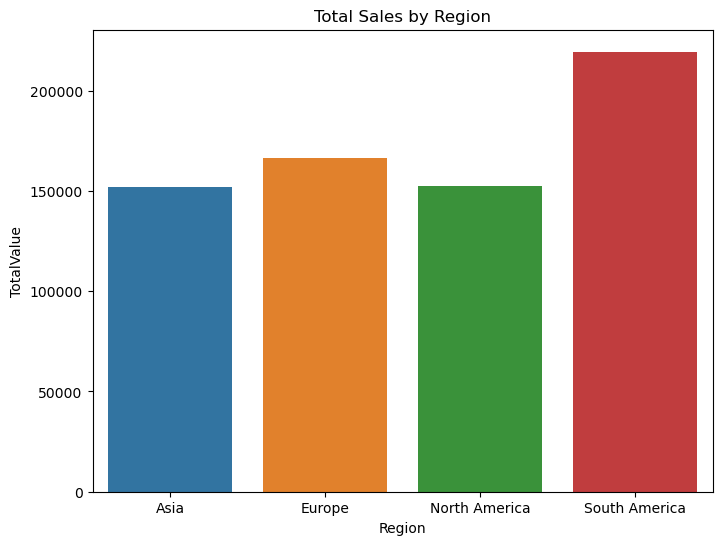

In [16]:
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='TotalValue', data=sales_by_region)
plt.title('Total Sales by Region')
plt.show()